We have consolidated our neural networks(NN) ideas here: [NN ideas->](neural_networks_templates.ipynb)

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from finta import TA
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

In [79]:
# Read csv, take a look
aapl_df = pd.read_csv(
    Path('signals_appl.csv'),
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True)
aapl_df
# Rename isPivot column to signal
aapl_df.rename(columns={'signal': 'isPivot'}, inplace=True)

C:\Users\amanl\AppData\Local\Temp\ipykernel_16520\1715360552.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(


In [80]:
# Calculate the returns using the closing prices and the pct_change function
aapl_df["actual_returns"] = aapl_df["Close"].pct_change()
aapl_df


,Open,High,Low,Close,Adj Close,Volume,isPivot,actual_returns
Date,,,,,,,,
2023-01-18,136.820007,138.610001,135.029999,135.210007,134.458450,69672800,0,NaN
2023-01-19,134.080002,136.250000,133.770004,135.270004,134.518112,58280400,0,0.000444
2023-01-20,135.279999,138.020004,134.220001,137.869995,137.103668,80223600,0,0.019221
2023-01-23,138.119995,143.320007,137.899994,141.110001,140.325638,81760300,0,0.023500
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.737747,66435100,0,0.010063
...,...,...,...,...,...,...,...,...
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,0,0.005671
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,1,-0.003223
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0,0.001778


In [81]:
# Create a new column in the `trading_df` called "signal" setting its value to zero.
aapl_df["signal"] = 0.0

In [82]:
# Create the signal to buy
aapl_df.loc[(aapl_df["isPivot"] >= 0), "signal"] = 1

In [83]:
# Create the signal to sell
aapl_df.loc[(aapl_df["isPivot"] < 0), "signal"] = -1

In [84]:
# Calculate Simple Moving Averages
aapl_df["AAPL_SMA5"] = TA.SMA(aapl_df, 5)
aapl_df["AAPL_SMA10"] = TA.SMA(aapl_df, 10)
aapl_df["AAPL_SMA20"] = TA.SMA(aapl_df, 20)
aapl_df["AAPL_SMA50"] = TA.SMA(aapl_df, 50)
aapl_df["AAPL_SMA100"] = TA.SMA(aapl_df, 100)

aapl_df

,Open,High,Low,Close,Adj Close,Volume,isPivot,actual_returns,signal,AAPL_SMA5,AAPL_SMA10,AAPL_SMA20,AAPL_SMA50,AAPL_SMA100
Date,,,,,,,,,,,,,,
2023-01-18,136.820007,138.610001,135.029999,135.210007,134.458450,69672800,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2023-01-19,134.080002,136.250000,133.770004,135.270004,134.518112,58280400,0,0.000444,1.0,NaN,NaN,NaN,NaN,NaN
2023-01-20,135.279999,138.020004,134.220001,137.869995,137.103668,80223600,0,0.019221,1.0,NaN,NaN,NaN,NaN,NaN
2023-01-23,138.119995,143.320007,137.899994,141.110001,140.325638,81760300,0,0.023500,1.0,NaN,NaN,NaN,NaN,NaN
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.737747,66435100,0,0.010063,1.0,138.398001,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,0,0.005671,1.0,183.995999,186.912999,191.323501,188.4114,182.657701
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,1,-0.003223,1.0,184.731998,186.156999,190.867500,188.7174,182.768700
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0,0.001778,1.0,185.679999,185.390999,190.265500,189.0204,182.869500


In [85]:
# Exponential Moving Averages
aapl_df["AAPL_EMA5"] = TA.EMA(aapl_df, 5)
aapl_df["AAPL_EMA10"] = TA.EMA(aapl_df, 10)
aapl_df["AAPL_EMA20"] = TA.EMA(aapl_df, 20)
aapl_df["AAPL_EMA50"] = TA.EMA(aapl_df, 50)
aapl_df["AAPL_EMA100"] = TA.EMA(aapl_df, 100)

aapl_df

,Open,High,Low,Close,Adj Close,Volume,isPivot,actual_returns,signal,AAPL_SMA5,AAPL_SMA10,AAPL_SMA20,AAPL_SMA50,AAPL_SMA100,AAPL_EMA5,AAPL_EMA10,AAPL_EMA20,AAPL_EMA50,AAPL_EMA100
Date,,,,,,,,,,,,,,,,,,,
2023-01-18,136.820007,138.610001,135.029999,135.210007,134.458450,69672800,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,135.210007,135.210007,135.210007,135.210007,135.210007
2023-01-19,134.080002,136.250000,133.770004,135.270004,134.518112,58280400,0,0.000444,1.0,NaN,NaN,NaN,NaN,NaN,135.246005,135.243005,135.241505,135.240605,135.240305
2023-01-20,135.279999,138.020004,134.220001,137.869995,137.103668,80223600,0,0.019221,1.0,NaN,NaN,NaN,NaN,NaN,136.488948,136.299038,136.206671,136.152356,136.134458
2023-01-23,138.119995,143.320007,137.899994,141.110001,140.325638,81760300,0,0.023500,1.0,NaN,NaN,NaN,NaN,NaN,138.408462,137.884036,137.622187,137.467103,137.415906
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.737747,66435100,0,0.010063,1.0,138.398001,NaN,NaN,NaN,NaN,139.990663,139.217765,138.809345,138.562275,138.480043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,0,0.005671,1.0,183.995999,186.912999,191.323501,188.4114,182.657701,185.406004,186.842876,188.782920,187.814056,184.931041
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,1,-0.003223,1.0,184.731998,186.156999,190.867500,188.7174,182.768700,185.467335,186.615080,188.478832,187.726833,184.944182
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0,0.001778,1.0,185.679999,185.390999,190.265500,189.0204,182.869500,185.618223,186.488701,188.235134,187.655974,184.963638


In [86]:
# Drop Nan
aapl_df = aapl_df.dropna()

aapl_df

,Open,High,Low,Close,Adj Close,Volume,isPivot,actual_returns,signal,AAPL_SMA5,AAPL_SMA10,AAPL_SMA20,AAPL_SMA50,AAPL_SMA100,AAPL_EMA5,AAPL_EMA10,AAPL_EMA20,AAPL_EMA50,AAPL_EMA100
Date,,,,,,,,,,,,,,,,,,,
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.478195,48870700,0,0.002160,1.0,179.628006,178.916002,175.968002,170.400201,160.363700,179.809545,178.610002,176.353194,170.952397,166.490781
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.300644,54274900,0,0.015639,1.0,180.470004,179.752002,176.529002,170.828801,160.849500,181.136361,179.551819,177.061490,171.464845,166.885728
2023-06-13,182.800003,184.149994,182.440002,183.309998,182.821945,54929100,0,-0.002612,1.0,181.290002,180.353001,177.091001,171.197001,161.329900,181.860906,180.235124,177.656608,171.937345,167.259568
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.460236,57462900,0,0.003491,1.0,182.516000,181.023001,177.685001,171.552601,161.790700,182.557270,180.910555,178.255998,172.416204,167.638345
2023-06-15,183.960007,186.520004,183.779999,186.009995,185.514740,65433200,0,0.011199,1.0,183.603998,181.615001,178.351000,171.960201,162.239700,183.708178,181.837726,178.994496,172.957741,168.054073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900,0,0.005671,1.0,183.995999,186.912999,191.323501,188.411400,182.657701,185.406004,186.842876,188.782920,187.814056,184.931041
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400,1,-0.003223,1.0,184.731998,186.156999,190.867500,188.717400,182.768700,185.467335,186.615080,188.478832,187.726833,184.944182
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0,0.001778,1.0,185.679999,185.390999,190.265500,189.020400,182.869500,185.618223,186.488701,188.235134,187.655974,184.963638


In [87]:
# Get column names
column_names = aapl_df.columns

# Display column names
print("Column Names:", column_names)

Column Names: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'isPivot',
       'actual_returns', 'signal', 'AAPL_SMA5', 'AAPL_SMA10', 'AAPL_SMA20',
       'AAPL_SMA50', 'AAPL_SMA100', 'AAPL_EMA5', 'AAPL_EMA10', 'AAPL_EMA20',
       'AAPL_EMA50', 'AAPL_EMA100'],
      dtype='object')


In [88]:
# Assign a copy of the 'AAPL_SMA5', 'AAPL_SMA10', 'AAPL_SMA20', 'AAPL_SMA50','AAPL_SMA200', 'AAPL_EMA5', 'AAPL_EMA10', 'AAPL_EMA20', 'AAPL_EMA50','AAPL_EMA100' columns to a new DataFrame called `X`
X = aapl_df[['AAPL_SMA5', 'AAPL_SMA10', 'AAPL_SMA20', 'AAPL_SMA50',
       'AAPL_SMA100', 'AAPL_EMA5', 'AAPL_EMA10', 'AAPL_EMA20', 'AAPL_EMA50',
       'AAPL_EMA100']].shift().dropna().copy()

# Display sample data
display(X.head())
display(X.tail())

,AAPL_SMA5,AAPL_SMA10,AAPL_SMA20,AAPL_SMA50,AAPL_SMA100,AAPL_EMA5,AAPL_EMA10,AAPL_EMA20,AAPL_EMA50,AAPL_EMA100
Date,,,,,,,,,,
2023-06-12,179.628006,178.916002,175.968002,170.400201,160.3637,179.809545,178.610002,176.353194,170.952397,166.490781
2023-06-13,180.470004,179.752002,176.529002,170.828801,160.8495,181.136361,179.551819,177.061490,171.464845,166.885728
2023-06-14,181.290002,180.353001,177.091001,171.197001,161.3299,181.860906,180.235124,177.656608,171.937345,167.259568
2023-06-15,182.516000,181.023001,177.685001,171.552601,161.7907,182.557270,180.910555,178.255998,172.416204,167.638345
2023-06-16,183.603998,181.615001,178.351000,171.960201,162.2397,183.708178,181.837726,178.994496,172.957741,168.054073


,AAPL_SMA5,AAPL_SMA10,AAPL_SMA20,AAPL_SMA50,AAPL_SMA100,AAPL_EMA5,AAPL_EMA10,AAPL_EMA20,AAPL_EMA50,AAPL_EMA100
Date,,,,,,,,,,
2024-01-10,183.607999,187.598999,191.673000,188.0520,182.535800,185.014005,186.987959,189.055859,187.880347,184.905420
2024-01-11,183.995999,186.912999,191.323501,188.4114,182.657701,185.406004,186.842876,188.782920,187.814056,184.931041
2024-01-12,184.731998,186.156999,190.867500,188.7174,182.768700,185.467335,186.615080,188.478832,187.726833,184.944182
2024-01-16,185.679999,185.390999,190.265500,189.0204,182.869500,185.618223,186.488701,188.235134,187.655974,184.963638
2024-01-17,185.294000,184.500999,189.541500,189.2136,182.933501,184.955483,185.968938,187.796550,187.498085,184.937051


In [89]:
# Save the signal column as our 'y'
y=aapl_df["signal"].copy()

In [90]:
# Set start of training period
training_begin = X.index.min()
# Display the training begin date
print(training_begin)

2023-06-12 00:00:00


In [91]:
# Select the ending period for the training data with an offset of 18 months
training_end = X.index.min() + DateOffset(months=7)
# Display the training end date
print(training_end)

2024-01-12 00:00:00


In [92]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [93]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Using Machine Learning Into a Trading Strategy

In [94]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [95]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [96]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        12
         1.0       0.92      1.00      0.96       137

    accuracy                           0.92       149
   macro avg       0.46      0.50      0.48       149
weighted avg       0.85      0.92      0.88       149



c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Backtesting a Machine Learning Trading Algorithm

In [97]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [98]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [99]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = aapl_df["actual_returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2024-01-12,1.0,0.001778,0.001778
2024-01-16,1.0,-0.012317,-0.012317
2024-01-17,1.0,-0.005174,-0.005174


<Axes: xlabel='Date'>

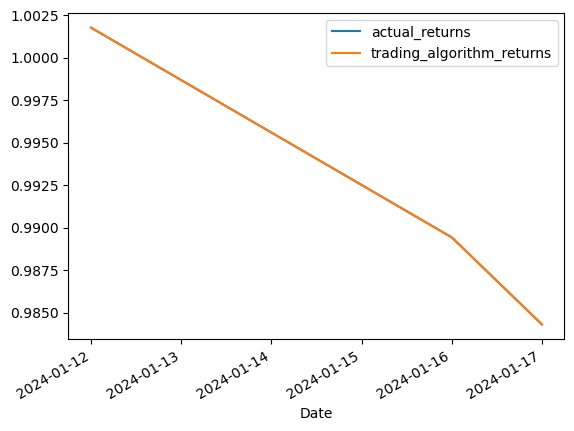

In [100]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

#### Visually Compare the Actual and Predicted Returns

Neural Networks

In [ ]:
num_predictors = len(X.columns)

# We have a binary outcome, so one output
num_classes = 1

num_predictors

In [ ]:
nn_model = Sequential()

In [ ]:
# Add dense layer(s)
nn_model.add(Dense(10, input_dim=num_predictors, activation='relu'))

In [ ]:
# Drop-out layer(s)
# nn_model.add(Dropout(.2,input_shape=(10,)))

# Add dense layer, add Regularization
#model.add(Dense(5, activation='relu', kernel_regularized=l2(0.01), bias_regularized=l2(0.01)))

In [ ]:
# Add output layer
# Number of outputs equals number of classes
#nn_model.add(Dense(num_classes))
nn_model.add(Dense(num_classes, activation="sigmoid"))

In [ ]:
# Compile model
nn_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

# Summarize model
nn_model.summary()

In [ ]:
# Fit model
num_epochs = 50

nn_model.fit(X_train_scaled, y_train,
          epochs=num_epochs,
          batch_size=100,
          validation_split=0.2,     # This 'validation_split' is telling the neural network to keep 20% of the data to validate its score on the training set... this is to help AVOID OVERFITTING. 
          shuffle=True)

In [ ]:
# Show model loss and accuracy

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Predict values using testing data
nn_test_predictions = nn_model.predict(X_test_scaled)
nn_train_predictions = nn_model.predict(X_train_scaled)

In [ ]:
nn_test_predictions

In [ ]:
nn_train_predictions

In [ ]:
# Evaluate model using Classification Report

#train_report = classification_report(y_test, )

In [ ]:
# # Save model history for further manipulation
# model_history = model.history.model_history.keys()

In [ ]:
# # Now we can plot the accuracy for training and validation

# training_results = pd.DataFrame(index=range(1, num_epochs+1))
# training_results['Training'] = model_history['categorical_accuracy']
# training_results['Validation'] = model_history['val_categorical_accuracy']
# training_results.plot(title = 'Training and Validation Performance')